In [1]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\Player Metrics\full_players_with_pos_fbref_ds.csv'

# Load the CSV file into a DataFrame
players_df = pd.read_csv(file_path)

import pandas as pd

# Assuming 'final_merged_df' is your DataFrame that includes the 'league' column
leagues_to_remove = ['JAP-J1 League', 'RUS-League', 'AUT-Football Bundesliga', 'TUR-League']

# Filter the DataFrame to keep only the rows where 'league' is not in the list of leagues to remove
new_players_df = players_df[~players_df['league'].isin(leagues_to_remove)]

# Filter the DataFrame to include only rows where 'RB' or 'RWB' appears in 'main_pos' or '2nd_pos'
CM_df = new_players_df[(new_players_df['main_pos'].isin(['CM', 'CDM', 'RM', 'LM'])) | 
                                            (new_players_df['2nd_pos'].isin(['CM', 'CDM', 'RM', 'LM']))]

# Display the first few rows of the filtered DataFrame to verify
print(CM_df.head(10))


                league  season         team            player nation    pos  \
5   ENG-Premier League    2324      Arsenal       Declan Rice    ENG     MF   
7   ENG-Premier League    2324      Arsenal  Emile Smith Rowe    ENG     MF   
9   ENG-Premier League    2324      Arsenal      Fabio Vieira    POR  MF,FW   
14  ENG-Premier League    2324      Arsenal          Jorginho    ITA     MF   
16  ENG-Premier League    2324      Arsenal       Kai Havertz    GER  MF,FW   
18  ENG-Premier League    2324      Arsenal   Martin Ødegaard    NOR     MF   
19  ENG-Premier League    2324      Arsenal    Mohamed Elneny    EGY     MF   
23  ENG-Premier League    2324      Arsenal     Thomas Partey    GHA  MF,DF   
26  ENG-Premier League    2324  Aston Villa   Boubacar Kamara    FRA     MF   
31  ENG-Premier League    2324  Aston Villa      Douglas Luiz    BRA     MF   

   age    born   90s  Standard_Gls  ...  Corner Kicks_Str  Outcomes_Cmp  \
5   24  1999.0  35.8             7  ...               0

In [2]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\Player Metrics\full_players_with_pos_fbref_ds.csv'

# Load the CSV file into a DataFrame
players_df = pd.read_csv(file_path)

# List of leagues to include
leagues_to_include = ['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1', 'ITA-Serie A', 'GER-Bundesliga', 'NED-Eredivisie', 'BEL-Pro League', 'POR-League']

# Filter the DataFrame to keep only the rows where 'league' is in the list of leagues to include
filtered_players_df = players_df[players_df['league'].isin(leagues_to_include)]

# Filter the DataFrame to include only rows where 'CM', 'CDM', 'RM', or 'LM' appears in 'main_pos' or '2nd_pos'
CM_df = filtered_players_df[(filtered_players_df['main_pos'].isin(['CM', 'CDM', 'RM', 'LM'])) | 
                            (filtered_players_df['2nd_pos'].isin(['CM', 'CDM', 'RM', 'LM']))]

# Display the first few rows of the filtered DataFrame to verify
print(CM_df.head(10))


                league  season         team            player nation    pos  \
5   ENG-Premier League    2324      Arsenal       Declan Rice    ENG     MF   
7   ENG-Premier League    2324      Arsenal  Emile Smith Rowe    ENG     MF   
9   ENG-Premier League    2324      Arsenal      Fabio Vieira    POR  MF,FW   
14  ENG-Premier League    2324      Arsenal          Jorginho    ITA     MF   
16  ENG-Premier League    2324      Arsenal       Kai Havertz    GER  MF,FW   
18  ENG-Premier League    2324      Arsenal   Martin Ødegaard    NOR     MF   
19  ENG-Premier League    2324      Arsenal    Mohamed Elneny    EGY     MF   
23  ENG-Premier League    2324      Arsenal     Thomas Partey    GHA  MF,DF   
26  ENG-Premier League    2324  Aston Villa   Boubacar Kamara    FRA     MF   
31  ENG-Premier League    2324  Aston Villa      Douglas Luiz    BRA     MF   

   age    born   90s  Standard_Gls  ...  Corner Kicks_Str  Outcomes_Cmp  \
5   24  1999.0  35.8             7  ...               0

In [3]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\Player Metrics\new_full_team_stats.csv'

# Load the CSV file into a DataFrame
team_stats_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(team_stats_df.head())


               league  season         team  players_used_misc  90s_misc  \
0  ENG-Premier League    2324      Arsenal                 25        38   
1  ENG-Premier League    2324  Aston Villa                 31        38   
2  ENG-Premier League    2324  Bournemouth                 30        38   
3  ENG-Premier League    2324    Brentford                 28        38   
4  ENG-Premier League    2324     Brighton                 30        38   

   Performance_CrdY_misc  Performance_CrdR_misc  Performance_2CrdY_misc  \
0                     64                      2                       1   
1                     94                      2                       0   
2                     79                      3                       0   
3                     89                      2                       0   
4                     90                      3                       0   

   Performance_Fls_misc  Performance_Fld_misc  ...  \
0                   391                   39

In [4]:
import pandas as pd

# Assuming CB_df is your DataFrame for centerbacks and team_stats_df is your DataFrame for team stats
# Ensure both dataframes have the 'league' and 'team' columns formatted similarly

# Merge the DataFrames on both 'league' and 'team' columns
CM_team_stats_df = pd.merge(CM_df, team_stats_df, on=['league', 'team'], suffixes=('', '_team'))

def filter_players_by_games_played(data, column, threshold):
    """ Filter out players who have played fewer games than the specified threshold. """
    filtered_df = data[data[column] >= threshold]
    return filtered_df

# Usage example, applying the filter
CM_team_stats_df = filter_players_by_games_played(CM_team_stats_df, '90s', 8.33)
print(CM_team_stats_df)


                 league  season     team             player nation    pos age  \
0    ENG-Premier League    2324  Arsenal        Declan Rice    ENG     MF  24   
3    ENG-Premier League    2324  Arsenal           Jorginho    ITA     MF  31   
4    ENG-Premier League    2324  Arsenal        Kai Havertz    GER  MF,FW  24   
5    ENG-Premier League    2324  Arsenal    Martin Ødegaard    NOR     MF  24   
7    ENG-Premier League    2324  Arsenal      Thomas Partey    GHA  MF,DF  30   
..                  ...     ...      ...                ...    ...    ...  ..   
823          POR-League    2324  Vitória       Tomás Händel    POR     MF  22   
825          POR-League    2324   Vizela  Aleksandar Busnić    SRB  MF,FW  25   
827          POR-League    2324   Vizela   Diogo Nascimento    POR     MF  20   
829          POR-League    2324   Vizela        Pedro Ortiz    ESP     MF  22   
830          POR-League    2324   Vizela               Samu    POR     MF  27   

       born   90s  Standard

In [5]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CM_team_stats_df = CM_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CM_team_stats_df.head())


               league  season     team           player nation    pos age  \
0  ENG-Premier League    2324  Arsenal      Declan Rice    ENG     MF  24   
3  ENG-Premier League    2324  Arsenal         Jorginho    ITA     MF  31   
4  ENG-Premier League    2324  Arsenal      Kai Havertz    GER  MF,FW  24   
5  ENG-Premier League    2324  Arsenal  Martin Ødegaard    NOR     MF  24   
7  ENG-Premier League    2324  Arsenal    Thomas Partey    GHA  MF,DF  30   

     born   90s  Standard_Gls  ...  Per 90 Minutes_G+A_allowed_stand  \
0  1999.0  35.8             7  ...                              1.26   
3  1991.0  10.2             0  ...                              1.26   
4  1999.0  29.3            13  ...                              1.26   
5  1998.0  34.3             8  ...                              1.26   
7  1993.0   8.8             0  ...                              1.26   

   Per 90 Minutes_G-PK_allowed_stand  Per 90 Minutes_G+A-PK_allowed_stand  \
0                          

In [6]:
import pandas as pd
from scipy.stats import zscore

# Assuming CM_team_stats_df is your DataFrame
# Check for required columns
required_columns = [
    'SCA_SCA', 'Tackles_Tkl', 'Touches_Att Pen', 
    'Blocks_Blocks', 'Standard_Sh', 'Expected_xG', 'Expected_xA', '90s',
    'Standard_Gls', 'Expected_G-xG', 'Aerial Duels_Won%', 'Aerial Duels_Won', 
    'Tackles_TklW', 'Challenges_Tkl', 'SCA_SCA90', 
    'PrgP', 'KP', 'Carries_Carries', 'Carries_PrgC', 'Carries_1/3', 
    'Carries_CPA', 'Carries_Mis', 'Carries_Dis', 'Take-Ons_Att', 
    'Total_Cmp%', 'Take-Ons_Tkld%', 'Short_Att', 'Medium_Att', 'Long_Att', 
    'Total_Att', 'Touches_Touches', 'Touches_Touches_allowed_poss', 'Total_PrgDist', 'Touches_Att 3rd', 'Touches_Att 3rd_poss', 'Touches_Att Pen_poss', 'Total_TotDist', 'Total_PrgDist', 'Take-Ons_Succ'
]
if not all(col in CM_team_stats_df.columns for col in required_columns):
    raise ValueError("One or more required columns are missing from the dataset.")

# Calculate per 90 stats for relevant columns
CM_team_stats_df['SCA_SCA_per90'] = (CM_team_stats_df['SCA Types_PassLive'] + CM_team_stats_df['SCA Types_PassDead']) / CM_team_stats_df['90s']
CM_team_stats_df['Tackles_Tkl_per90'] = CM_team_stats_df['Tackles_Tkl'] / CM_team_stats_df['90s']
CM_team_stats_df['Touches_Touches_allowed_per90'] = CM_team_stats_df['Touches_Touches_allowed_poss'] / CM_team_stats_df['90s']
CM_team_stats_df['Tackles_Tkl_per100_team_touches_allowed'] = (CM_team_stats_df['Tackles_Tkl_per90'] / CM_team_stats_df['Touches_Touches_allowed_per90']) * 100

CM_team_stats_df['Touches_Att_Pen_per90'] = CM_team_stats_df['Touches_Att Pen'] / CM_team_stats_df['90s']
CM_team_stats_df['Blocks_per90'] = CM_team_stats_df['Blocks_Blocks'] / CM_team_stats_df['90s']
CM_team_stats_df['Blocks_per_100_team_touches_allowed'] = (CM_team_stats_df['Blocks_Blocks'] / CM_team_stats_df['Touches_Touches_allowed_per90']) * 100

CM_team_stats_df['Shots_per90'] = CM_team_stats_df['Standard_Sh'] / CM_team_stats_df['90s']
CM_team_stats_df['xG_per90'] = CM_team_stats_df['Expected_xG'] / CM_team_stats_df['90s']
CM_team_stats_df['xA_per90'] = CM_team_stats_df['Expected_xA'] / CM_team_stats_df['90s']

# Calculate additional per 90 stats for percentage-based and other columns
CM_team_stats_df['Standard_Gls_per90'] = CM_team_stats_df['Standard_Gls'] / CM_team_stats_df['90s']
CM_team_stats_df['Expected_G-xG_per90'] = CM_team_stats_df['Expected_G-xG'] / CM_team_stats_df['90s']
CM_team_stats_df['Aerial_Duels_Won%_per90'] = CM_team_stats_df['Aerial Duels_Won%']
CM_team_stats_df['Aerial_Duels_Won_per90'] = CM_team_stats_df['Aerial Duels_Won'] / CM_team_stats_df['90s']
CM_team_stats_df['Tackles_TklW_per90'] = CM_team_stats_df['Tackles_TklW'] / CM_team_stats_df['90s']
CM_team_stats_df['Tackles_TklW_per100_team_touches_allowed'] = (CM_team_stats_df['Tackles_TklW_per90'] / CM_team_stats_df['Touches_Touches_allowed_per90']) * 100

CM_team_stats_df['Challenges_Tkl_per90'] = CM_team_stats_df['Challenges_Tkl'] / CM_team_stats_df['90s']
CM_team_stats_df['Challenges_Tkl_per100_team_touches_allowed'] = (CM_team_stats_df['Challenges_Tkl_per90'] / CM_team_stats_df['Touches_Touches_allowed_per90']) * 100

CM_team_stats_df['Challenges_pct_won_per90'] = CM_team_stats_df['Challenges_Tkl%']

CM_team_stats_df['PrgP_per90'] = CM_team_stats_df['PrgP'] / CM_team_stats_df['90s']
CM_team_stats_df['KP_per90'] = CM_team_stats_df['KP'] / CM_team_stats_df['90s']
CM_team_stats_df['Carries_Carries_per90'] = CM_team_stats_df['Carries_Carries'] / CM_team_stats_df['90s']
CM_team_stats_df['Carries_PrgC_per90'] = CM_team_stats_df['Carries_PrgC'] / CM_team_stats_df['90s']
CM_team_stats_df['Carries_1/3_per90'] = CM_team_stats_df['Carries_1/3'] / CM_team_stats_df['90s']
#CM_team_stats_df['Carries_CPA_per90'] = CM_team_stats_df['Carries_CPA'] / CM_team_stats_df['90s']
CM_team_stats_df['Carries_CPA_and_1/3_per90'] = (CM_team_stats_df['Carries_CPA'] + CM_team_stats_df['Carries_1/3'])  / CM_team_stats_df['90s']

CM_team_stats_df['Carries_Mis_and_Dis_per90'] = (CM_team_stats_df['Carries_Mis'] + CM_team_stats_df['Carries_Dis']) / CM_team_stats_df['90s']
CM_team_stats_df['Carries_Dis_per90'] = CM_team_stats_df['Carries_Dis'] / CM_team_stats_df['90s']
CM_team_stats_df['Take-Ons_Att_per90'] = CM_team_stats_df['Take-Ons_Att'] / CM_team_stats_df['90s']
CM_team_stats_df['Total_Cmp%_per90'] = CM_team_stats_df['Total_Cmp%']
CM_team_stats_df['Take-Ons_Tkld%_per90'] = CM_team_stats_df['Take-Ons_Tkld%'] / CM_team_stats_df['90s']
CM_team_stats_df['Short_Att_per90'] = CM_team_stats_df['Short_Att'] / CM_team_stats_df['90s']
CM_team_stats_df['Short_Medium_Att_per90'] = (CM_team_stats_df['Short_Att'] + CM_team_stats_df['Medium_Att']) / CM_team_stats_df['Long_Att']
CM_team_stats_df['Carries_Mis_Dis_per90'] = (CM_team_stats_df['Carries_Mis'] + CM_team_stats_df['Carries_Dis']) / CM_team_stats_df['90s']
CM_team_stats_df['Touches_per_Dispossessions_or_Miscontrols'] = CM_team_stats_df['Touches_Touches'] / (CM_team_stats_df['Carries_Mis'] + CM_team_stats_df['Carries_Dis'])
CM_team_stats_df['Total_Short_Cmp_per90'] = CM_team_stats_df['Short_Cmp%']
CM_team_stats_df['PrgDist_per_Carry'] = CM_team_stats_df['Total_PrgDist'] / CM_team_stats_df['Carries_Carries']
CM_team_stats_df['PrgC_per_Carry'] = CM_team_stats_df['Carries_PrgC'] / CM_team_stats_df['Carries_Carries']

# Calculate additional metrics
CM_team_stats_df['Total_Pass_Completion%'] = CM_team_stats_df['Total_Cmp%']
CM_team_stats_df['PrgP_per_Total_Passes'] = CM_team_stats_df['PrgP'] / CM_team_stats_df['Total_Att']

# New metrics
CM_team_stats_df['Shots_per_100_touches'] = (CM_team_stats_df['Standard_Sh'] / CM_team_stats_df['Touches_Touches']) * 100
CM_team_stats_df['PrgDist_per90'] = CM_team_stats_df['Total_PrgDist'] / CM_team_stats_df['90s']
CM_team_stats_df['Carries_per_100_touches'] = (CM_team_stats_df['Carries_Carries'] / CM_team_stats_df['Touches_Touches']) * 100
CM_team_stats_df['Touches_Att_Third_Att_Pen_per_dispossession_or_miscontrol'] = (CM_team_stats_df['Touches_Att Pen'] + CM_team_stats_df['Touches_Att 3rd']) / (CM_team_stats_df['Carries_Mis'] + CM_team_stats_df['Carries_Dis'])
CM_team_stats_df['Passes_per_incomplete_pass'] = CM_team_stats_df['Total_Att'] / (CM_team_stats_df['Total_Att'] - CM_team_stats_df['Total_Cmp'])
CM_team_stats_df['Carries_TotDist_per90'] = CM_team_stats_df['Total_TotDist'] / CM_team_stats_df['90s']
CM_team_stats_df['Shot_on_tgt_per_90'] = CM_team_stats_df['Standard_SoT'] / CM_team_stats_df['90s']
CM_team_stats_df['Total_touches_att_3rd_pen_per_team_touches'] = (CM_team_stats_df['Touches_Att 3rd'] + CM_team_stats_df['Touches_Att Pen']) / (CM_team_stats_df['Touches_Att 3rd_poss'] + CM_team_stats_df['Touches_Att Pen_poss'])
CM_team_stats_df['Total_Passing_Dist_per90'] = CM_team_stats_df['Total_TotDist'] / CM_team_stats_df['90s']
CM_team_stats_df['Passing_Dist_per_pass'] = CM_team_stats_df['Total_TotDist'] / CM_team_stats_df['Total_Att']
CM_team_stats_df['Prg_Passing_Dist_per_incomplete_pass'] = CM_team_stats_df['Total_PrgDist'] / (CM_team_stats_df['Total_Att'] - CM_team_stats_df['Total_Cmp'])
CM_team_stats_df['Short_Passes_per_100_touches'] = (CM_team_stats_df['Short_Att'] / CM_team_stats_df['Touches_Touches']) * 100

# Calculate "Take Ons per 100 touches" and "Successful Take Ons per 100 touches"
CM_team_stats_df['Take_Ons_per_100_touches'] = (CM_team_stats_df['Take-Ons_Att'] / CM_team_stats_df['Touches_Touches']) * 100
CM_team_stats_df['Successful_Take_Ons_per_100_touches'] = (CM_team_stats_df['Take-Ons_Succ'] / CM_team_stats_df['Touches_Touches']) * 100

# List of columns to calculate z-scores for
per90_columns = [
    'SCA_SCA_per90', 'Touches_Att_Pen_per90', 'Shots_per90', 'xG_per90', 'xA_per90',
    'Standard_Gls_per90', 'Expected_G-xG_per90', 'Aerial_Duels_Won%_per90',
    'Aerial_Duels_Won_per90', 'Challenges_Tkl_per90', 'PrgP_per90',
    'KP_per90', 'Carries_Carries_per90', 'Carries_PrgC_per90', 'Carries_1/3_per90',
    'Carries_CPA_and_1/3_per90', 'Carries_Mis_and_Dis_per90', 'Take-Ons_Att_per90',
    'Total_Cmp%_per90', 'Take-Ons_Tkld%_per90', 'Short_Att_per90', 'Short_Medium_Att_per90',
    'Carries_Mis_Dis_per90', 'Total_Pass_Completion%', 'PrgP_per_Total_Passes', 'Challenges_pct_won_per90',
    'Touches_per_Dispossessions_or_Miscontrols', 'PrgC_per_Carry', 'PrgDist_per_Carry',
    'Tackles_Tkl_per100_team_touches_allowed', 'Blocks_per_100_team_touches_allowed',
    'Tackles_TklW_per100_team_touches_allowed', 'Challenges_Tkl_per100_team_touches_allowed',
    'Shots_per_100_touches', 'PrgDist_per90', 'Carries_per_100_touches',
    'Touches_Att_Third_Att_Pen_per_dispossession_or_miscontrol', 'Passes_per_incomplete_pass', 'Carries_TotDist_per90', 'Shot_on_tgt_per_90',
    'Total_touches_att_3rd_pen_per_team_touches', 'Total_Passing_Dist_per90', 'Passing_Dist_per_pass', 'Prg_Passing_Dist_per_incomplete_pass', 'Short_Passes_per_100_touches',
    'Take_Ons_per_100_touches', 'Successful_Take_Ons_per_100_touches'
]

# Drop rows where per90 columns have NaN values
CM_team_stats_df = CM_team_stats_df.dropna(subset=per90_columns).copy()

# Calculate z-scores and add to DataFrame
for column in per90_columns:
    if column == 'Passing_Dist_per_pass':
        CM_team_stats_df[column + '_zscore'] = -zscore(CM_team_stats_df[column])  # Invert the z-score
    else:
        CM_team_stats_df[column + '_zscore'] = zscore(CM_team_stats_df[column])

# Normalize z-scores to 0-100 scale
for column in per90_columns:
    CM_team_stats_df[column + '_zscore'] = 50 + 10 * CM_team_stats_df[column + '_zscore']

# Rename columns for a more official look
zscore_renamed_columns = {
    'SCA_SCA_per90_zscore': 'SCA Passes (per 90) Z-Score',
    'Touches_Att_Pen_per90_zscore': 'Touches (per 90) Z-Score',
    'Shots_per90_zscore': 'Shots (per 90) Z-Score',
    'xG_per90_zscore': 'xG (per 90) Z-Score',
    'xA_per90_zscore': 'xA (per 90) Z-Score',
    'Standard_Gls_per90_zscore': 'Standard Goals Z-Score',
    'Expected_G-xG_per90_zscore': 'Expected Goals - xG Z-Score',
    'Aerial_Duels_Won%_per90_zscore': 'Aerial Duels Won % Z-Score',
    'Aerial_Duels_Won_per90_zscore': 'Aerial Duels Won Z-Score',
    'Challenges_Tkl_per90_zscore': 'Challenges Tackles Z-Score',
    'SCA_SCA90_per90_zscore': 'SCA (90) Z-Score',
    'PrgP_per90_zscore': 'Progressive Passes Z-Score',
    'KP_per90_zscore': 'Key Passes Z-Score',
    'Carries_Carries_per90_zscore': 'Carries Z-Score',
    'Carries_PrgC_per90_zscore': 'Progressive Carries Z-Score',
    'Carries_CPA_and_1/3_per90_zscore': 'Carries into final 3rd and pen area Z-Score',
    #'Carries_CPA_per90_zscore': 'Carries CPA Z-Score',
    'Carries_Mis_Dis_per90_zscore': 'Carries Mis and Dis Z-Score',
    'Take-Ons_Att_per90_zscore': 'Take-Ons Attempted Z-Score',
    'Total_Cmp%_per90_zscore': 'Total Passes Completed % Z-Score',
    'Total_Short_Cmp_per90_zscore': 'Total Short Passes Completed % Z-Score',
    'Take-Ons_Tkld%_per90_zscore': 'Take-Ons Tackled % Z-Score',
    'Short_Medium_Att_per90_zscore': 'Short and Med Passes Per Long Pass Z-Score',
    'Total_Pass_Completion%_zscore': 'Total Pass Completion % Z-Score',
    'PrgP_per_Total_Passes_zscore': 'Progressive Passes per Total Passes Z-Score',
    'Challenges_pct_won_per90_zscore': 'Challenges Won Pct Z-Score',
    'PrgDist_per_Carry_zscore': 'Progressive Distance per Carry Z-Score',
    'PrgC_per_Carry_zscore': 'Progressive Carries per Carry Z-Score',
    'Tackles_Tkl_per100_team_touches_allowed_zscore': 'Tackles Per 100 Touches Allowed Z-Score',
    'Blocks_per_100_team_touches_allowed_zscore': 'Blocks Per 100 Touches Allowed Z-Score',
    'Tackles_TklW_per100_team_touches_allowed_zscore': 'Tackles Won Per 100 Team Touches Allowed',
    'Challenges_Tkl_per100_team_touches_allowed_zscore': 'Challenge Tackles Per 100 Touches Allowed Z-Score',
    'Shots_per_100_touches_zscore': 'Shots per 100 Touches Z-Score',
    'PrgDist_per90_zscore': 'Progressive Carry Distance per 90 Z-Score',
    'Carries_per_100_touches_zscore': 'Carries per 100 Touches Z-Score',
    'Touches_Att_Third_Att_Pen_per_dispossession_or_miscontrol_zscore': 'Touches in Attacking Third/Pen per Dispossession or Miscontrol Z-Score',
    'Passes_per_incomplete_pass_zscore': 'Passes per Incomplete Pass Z-Score',
    'Carries_TotDist_per90_zscore': 'Total Carry Distance Per 90 Z-Score',
    'Shot_on_tgt_per_90_zscore': 'Shots On Target Per 90 Z-Score',
    'Total_touches_att_3rd_pen_per_team_touches_zscore': 'Total Touches Attacking Third/Pen per Team Touches Z-Score',
    'Total_Passing_Dist_per90_zscore': 'Total Passing Distance Per 90 Z-Score',
    'Passing_Dist_per_pass_zscore': 'Passing Distance per Pass Z-Score',
    'Prg_Passing_Dist_per_incomplete_pass_zscore': 'Progressive Passing Distance per Incomplete Pass Z-Score',
    'Touches_per_Dispossessions_or_Miscontrols_zscore': 'Touches Per Dis or Mis Z-Score',
    'Short_Passes_per_100_touches_zscore': 'Short Passes Per 100 Touches Z-Score',
    'Take_Ons_per_100_touches_zscore': 'Take Ons per 100 Touches Z-Score',
    'Successful_Take_Ons_per_100_touches_zscore': 'Successful Take Ons per 100 Touches Z-Score'
}

# Create a new DataFrame with player name, team, and Z-scores with official names
zscore_df = CM_team_stats_df[['player', 'team'] + [col + '_zscore' for col in per90_columns]]
zscore_df = zscore_df.rename(columns=zscore_renamed_columns)

# Display the new DataFrame
zscore_df

,player,team,SCA Passes (per 90) Z-Score,Touches (per 90) Z-Score,Shots (per 90) Z-Score,xG (per 90) Z-Score,xA (per 90) Z-Score,Standard Goals Z-Score,Expected Goals - xG Z-Score,Aerial Duels Won % Z-Score,...,Passes per Incomplete Pass Z-Score,Total Carry Distance Per 90 Z-Score,Shots On Target Per 90 Z-Score,Total Touches Attacking Third/Pen per Team Touches Z-Score,Total Passing Distance Per 90 Z-Score,Passing Distance per Pass Z-Score,Progressive Passing Distance per Incomplete Pass Z-Score,Short Passes Per 100 Touches Z-Score,Take Ons per 100 Touches Z-Score,Successful Take Ons per 100 Touches Z-Score
0,Declan Rice,Arsenal,52.299466,52.251899,56.349570,48.984405,53.544784,59.381407,67.161355,52.041273,...,67.266570,63.090042,57.873473,55.807858,63.090042,40.374486,66.938941,56.076886,44.159978,43.702155
3,Jorginho,Arsenal,52.513350,40.497453,37.431803,38.726024,63.510248,40.850760,49.530227,53.883272,...,67.722337,69.800772,36.343553,38.737866,69.800772,42.858603,70.285765,64.664819,39.579933,38.759683
4,Kai Havertz,Arsenal,57.839709,89.765336,67.144608,87.697799,55.304526,82.899338,55.458416,54.036771,...,47.377545,36.657030,71.856898,56.860343,36.657030,69.562991,40.390509,71.713391,50.232094,47.702954
5,Martin Ødegaard,Arsenal,85.749224,77.261571,65.076669,63.531143,80.254629,62.954789,53.891039,34.695787,...,54.221075,54.486006,59.938587,74.719699,54.486006,52.734140,54.097303,62.883182,51.045144,50.712035
7,Thomas Partey,Arsenal,55.352678,42.128085,45.395645,43.020091,44.399237,40.850760,43.834812,51.350524,...,70.228315,66.716846,45.102316,35.975093,66.716846,43.307947,69.041924,67.892959,44.565656,47.921915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Tomás Händel,Vitória,48.979890,41.796541,45.145549,44.858104,44.849843,47.620119,52.808142,66.086512,...,53.973168,49.796092,43.225438,51.576578,49.796092,46.722538,53.582810,59.142518,46.854502,50.316740
825,Aleksandar Busnić,Vizela,44.251819,40.330598,40.452571,43.213324,39.834859,40.850760,43.578518,54.957771,...,46.180600,45.737820,45.411449,33.629780,45.737820,46.661764,50.376310,47.242195,42.948625,45.106555
827,Diogo Nascimento,Vizela,50.447967,45.544827,47.438095,44.069453,42.454119,40.850760,42.442995,39.300783,...,63.496229,56.105509,49.189739,53.012375,56.105509,43.355457,58.576662,62.337541,50.578949,54.120798
829,Pedro Ortiz,Vizela,44.453320,39.663176,32.900652,37.545156,37.657812,40.850760,51.096466,64.858513,...,56.694620,53.521101,36.343553,34.018729,53.521101,41.240238,63.093562,49.984484,42.707953,47.250984


In [7]:
import pandas as pd
from scipy.stats import zscore

# Define a piecewise function for weighting z-scores
def piecewise_zscore(z):
    if z >= 65:  # High range
        return z * 1.5
    elif z >= 45:  # Mid range
        return z * 1.2
    else:  # Low range
        return z

# Apply the piecewise function to z-scores
for column in zscore_df.columns:
    if 'Z-Score' in column:
        zscore_df[column] = zscore_df[column].apply(piecewise_zscore)

# Combine z-scores into different categories
zscore_df.loc[:, 'Box_Threat_Z-Score'] = zscore_df[['Shots (per 90) Z-Score', 'xG (per 90) Z-Score', 'Standard Goals Z-Score', 'Touches (per 90) Z-Score', 'Expected Goals - xG Z-Score', 'Shots per 100 Touches Z-Score', 'Shots On Target Per 90 Z-Score']].mean(axis=1)

zscore_df.loc[:, 'Passing_Creativity_Z-Score'] = zscore_df[['SCA Passes (per 90) Z-Score', 'Progressive Passes per Total Passes Z-Score', 'xA (per 90) Z-Score', 'Progressive Passes Z-Score', 'Key Passes Z-Score']].mean(axis=1)

zscore_df.loc[:, 'Defensive_Z-Score'] = zscore_df[['Tackles Per 100 Touches Allowed Z-Score', 'Blocks Per 100 Touches Allowed Z-Score', 'Challenge Tackles Per 100 Touches Allowed Z-Score', 'Tackles Won Per 100 Team Touches Allowed', 'Challenges Won Pct Z-Score']].mean(axis=1)

zscore_df.loc[:, 'Carrying_Z-Score'] = zscore_df[['Carries into final 3rd and pen area Z-Score', 'Successful Take Ons per 100 Touches Z-Score',  'Progressive Carries Z-Score', 'Take Ons per 100 Touches Z-Score', 'Progressive Carries per Carry Z-Score', ]].mean(axis=1)

zscore_df.loc[:, 'Ball_Retention_Z-Score'] = zscore_df[['Touches in Attacking Third/Pen per Dispossession or Miscontrol Z-Score',  'Total Touches Attacking Third/Pen per Team Touches Z-Score', 'Touches Per Dis or Mis Z-Score', 'Passing Distance per Pass Z-Score', 'Short Passes Per 100 Touches Z-Score']].mean(axis=1)

zscore_df.loc[:, 'Aerial_Ability_Z-Score'] = zscore_df[['Aerial Duels Won % Z-Score', 'Aerial Duels Won Z-Score']].mean(axis=1)

# Apply weights to each category
weights = {
    'Passing_Creativity_Z-Score': 0.3,
    'Defensive_Z-Score': 0.2,
    'Ball_Retention_Z-Score': 0.15,
    'Box_Threat_Z-Score': 0.15,
    'Carrying_Z-Score': 0.15,
    'Aerial_Ability_Z-Score': 0.05
}

# Combine the category scores into an overall player rating using the specified weights
zscore_df.loc[:, 'Overall_Player_Rating'] = (
    zscore_df['Passing_Creativity_Z-Score'] * weights['Passing_Creativity_Z-Score'] +
    zscore_df['Defensive_Z-Score'] * weights['Defensive_Z-Score'] +
    zscore_df['Ball_Retention_Z-Score'] * weights['Ball_Retention_Z-Score'] +
    zscore_df['Box_Threat_Z-Score'] * weights['Box_Threat_Z-Score'] +
    zscore_df['Carrying_Z-Score'] * weights['Carrying_Z-Score'] +
    zscore_df['Aerial_Ability_Z-Score'] * weights['Aerial_Ability_Z-Score']
)

# Standardize the final z-scores to a common scale
zscore_columns_final = ['Box_Threat_Z-Score', 'Passing_Creativity_Z-Score', 'Defensive_Z-Score', 'Carrying_Z-Score', 'Ball_Retention_Z-Score', 'Aerial_Ability_Z-Score', 'Overall_Player_Rating']

for column in zscore_columns_final:
    zscore_df[column] = zscore(zscore_df[column])

# Scale the standardized z-scores to fit a 0-100 range without forcing min and max
for column in zscore_columns_final:
    mean_val = zscore_df[column].mean()
    std_val = zscore_df[column].std()
    zscore_df[column] = 50 + 10 * (zscore_df[column] - mean_val) / std_val

# Select columns to display in the final DataFrame
final_columns = [
    'player', 'team', 'Box_Threat_Z-Score', 'Passing_Creativity_Z-Score', 'Defensive_Z-Score', 'Carrying_Z-Score', 'Ball_Retention_Z-Score', 'Aerial_Ability_Z-Score', 'Overall_Player_Rating'
]

# Create the final DataFrame
final_df = zscore_df[final_columns]

# Display the final DataFrame
final_df


,player,team,Box_Threat_Z-Score,Passing_Creativity_Z-Score,Defensive_Z-Score,Carrying_Z-Score,Ball_Retention_Z-Score,Aerial_Ability_Z-Score,Overall_Player_Rating
0,Declan Rice,Arsenal,57.231347,58.950389,75.530230,48.529595,61.057604,52.201617,68.128045
3,Jorginho,Arsenal,38.781152,62.624682,41.604380,39.412095,79.330882,50.747919,53.143301
4,Kai Havertz,Arsenal,83.488498,51.886525,47.124000,52.866811,69.127141,73.905949,67.077360
5,Martin Ødegaard,Arsenal,64.661209,91.488162,48.478781,57.924500,65.594379,35.583442,82.454585
7,Thomas Partey,Arsenal,41.560830,54.043315,40.011900,48.771434,54.814192,50.362172,46.894353
...,...,...,...,...,...,...,...,...,...
823,Tomás Händel,Vitória,45.197005,49.769818,57.643010,49.608239,54.049023,63.628775,53.077574
825,Aleksandar Busnić,Vizela,40.171069,43.037727,41.739965,39.517381,42.102034,65.915154,36.730202
827,Diogo Nascimento,Vizela,44.563094,49.925359,48.260276,47.104434,44.706626,38.337871,44.598832
829,Pedro Ortiz,Vizela,38.153069,41.800433,45.637739,41.239639,37.306526,56.004638,35.432809


In [8]:
top_30_players = final_df.sort_values(by='Overall_Player_Rating', ascending=False).head(30)

top_30_players

,player,team,Box_Threat_Z-Score,Passing_Creativity_Z-Score,Defensive_Z-Score,Carrying_Z-Score,Ball_Retention_Z-Score,Aerial_Ability_Z-Score,Overall_Player_Rating
76,Kevin De Bruyne,Manchester City,80.082400,93.299759,36.767335,60.751274,74.235248,48.056000,87.877234
346,Cameron Puertas,Union SG,70.573970,76.475121,66.365288,74.053929,56.051566,37.718217,85.388425
484,Kevin Stöger,Bochum,59.519586,94.750654,58.095405,53.778046,65.984496,35.051434,84.828804
5,Martin Ødegaard,Arsenal,64.661209,91.488162,48.478781,57.924500,65.594379,35.583442,82.454585
702,Ismael Saibari,PSV Eindhoven,87.541010,72.721865,48.450796,74.239249,44.091235,47.528350,80.880182
277,Adem Zorgane,Charleroi,51.725704,86.793937,54.827322,53.618546,65.841246,51.654290,78.245168
516,Andrej Kramarić,Hoffenheim,89.752790,73.711696,40.409788,56.745949,64.462113,43.732765,76.900160
63,Harvey Elliott,Liverpool,72.865079,79.376071,41.630032,55.250457,73.335994,44.764730,76.843987
172,Sávio,Girona,66.242913,54.135333,58.517343,96.252987,62.595229,35.373075,76.479478
13,Leon Bailey,Aston Villa,83.704191,63.793795,37.036160,85.321458,59.495199,40.802903,76.311075


In [9]:
# Assuming CM_team_stats_df contains the 'main_pos' column
# Merge final_df with CM_team_stats_df on 'player' and 'team' to bring in 'main_pos'
zscore_df = zscore_df.merge(CM_team_stats_df[['player', 'team', 'main_pos', 'age', 'league']], on=['player', 'team'], how='left')

# Display the updated DataFrame
zscore_df

,player,team,SCA Passes (per 90) Z-Score,Touches (per 90) Z-Score,Shots (per 90) Z-Score,xG (per 90) Z-Score,xA (per 90) Z-Score,Standard Goals Z-Score,Expected Goals - xG Z-Score,Aerial Duels Won % Z-Score,...,Box_Threat_Z-Score,Passing_Creativity_Z-Score,Defensive_Z-Score,Carrying_Z-Score,Ball_Retention_Z-Score,Aerial_Ability_Z-Score,Overall_Player_Rating,main_pos,age,league
0,Declan Rice,Arsenal,62.759359,62.702279,67.619484,58.781286,64.253740,71.257689,100.742033,62.449528,...,57.231347,58.950389,75.530230,48.529595,61.057604,52.201617,68.128045,CM,24,ENG-Premier League
1,Jorginho,Arsenal,63.016020,40.497453,37.431803,38.726024,76.212297,40.850760,59.436272,64.659926,...,38.781152,62.624682,41.604380,39.412095,79.330882,50.747919,53.143301,CM,31,ENG-Premier League
2,Kai Havertz,Arsenal,69.407651,134.648005,100.716912,131.546698,66.365431,124.349007,66.550099,64.844126,...,83.488498,51.886525,47.124000,52.866811,69.127141,73.905949,67.077360,LM,24,ENG-Premier League
3,Martin Ødegaard,Arsenal,128.623836,115.892356,97.615004,76.237371,120.381944,75.545747,64.669246,34.695787,...,64.661209,91.488162,48.478781,57.924500,65.594379,35.583442,82.454585,RM,24,ENG-Premier League
4,Thomas Partey,Arsenal,66.423214,42.128085,54.474773,43.020091,44.399237,40.850760,43.834812,61.620628,...,41.560830,54.043315,40.011900,48.771434,54.814192,50.362172,46.894353,CM,30,ENG-Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Tomás Händel,Vitória,58.775868,41.796541,54.174658,44.858104,44.849843,57.144143,63.369770,99.129767,...,45.197005,49.769818,57.643010,49.608239,54.049023,63.628775,53.077574,CM,22,POR-League
442,Aleksandar Busnić,Vizela,44.251819,40.330598,40.452571,43.213324,39.834859,40.850760,43.578518,65.949325,...,40.171069,43.037727,41.739965,39.517381,42.102034,65.915154,36.730202,CM,25,POR-League
443,Diogo Nascimento,Vizela,60.537560,54.653793,56.925714,44.069453,42.454119,40.850760,42.442995,39.300783,...,44.563094,49.925359,48.260276,47.104434,44.706626,38.337871,44.598832,CM,20,POR-League
444,Pedro Ortiz,Vizela,44.453320,39.663176,32.900652,37.545156,37.657812,40.850760,61.315759,77.830215,...,38.153069,41.800433,45.637739,41.239639,37.306526,56.004638,35.432809,CM,22,POR-League


In [10]:
final_df = final_df.merge(CM_team_stats_df[['player', 'team', 'main_pos', 'age', 'league']], on=['player', 'team'], how='left')


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Assuming final_df is your DataFrame with the necessary columns
# Calculate percentiles for each player's stats
percentile_df = final_df.copy()
percentile_columns = [
    'Box_Threat_Z-Score', 
    'Passing_Creativity_Z-Score', 
    'Defensive_Z-Score', 
    'Carrying_Z-Score', 
    'Ball_Retention_Z-Score', 
    'Overall_Player_Rating',
    'Aerial_Ability_Z-Score'
]

for col in percentile_columns:
    percentile_df[col] = percentile_df[col].rank(pct=True) * 100

# Define the colors for each column header
column_colors = {
    "Similarity Score": "magenta",
    "Box_Threat_Z-Score": "lime",
    "Passing_Creativity_Z-Score": "yellow",
    "Defensive_Z-Score": "lightcoral",
    "Carrying_Z-Score": "cyan",
    "Ball_Retention_Z-Score": "orange",
    "Overall_Player_Rating": "violet",
    "Aerial_Ability_Z-Score": "deepskyblue"
}

# Path to save the images
base_path = "C:\\Users\\jbuck\\Dropbox\\Soccer_Projects\\Player Scouting"

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 18, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Update column definitions to include color mapping for the progress donuts
col_defs = [
    ColumnDefinition(name="Box Threat", title="Box Threat", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Box_Threat_Z-Score"]}, width=6),
    ColumnDefinition(name="Passing Creativity", title="Passing Creativity", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Passing_Creativity_Z-Score"]}, width=6),
    ColumnDefinition(name="Defensive", title="Defensive", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Defensive_Z-Score"]}, width=5),
    ColumnDefinition(name="Carrying", title="Carrying", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Carrying_Z-Score"]}, width=5),
    ColumnDefinition(name="Ball Retention", title="Ball Retention", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Ball_Retention_Z-Score"]}, width=5),
    ColumnDefinition(name="Aerial Ability", title="Aerial Ability", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Aerial_Ability_Z-Score"]}, width=5),
    ColumnDefinition(name="Overall Rating", title="Overall Rating", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Overall_Player_Rating"]}, width=6),
    ColumnDefinition(name="Age", title="Age", textprops={"ha": "center", "color": "white"}, width=3),
    ColumnDefinition(name="Position", title="Position", textprops={"ha": "center", "color": "white"}, width=3),
]

# Iterate through each team in the DataFrame
for team_name in final_df['team'].unique():
    # Filter the DataFrame for the specified team
    team_df = percentile_df[percentile_df['team'] == team_name].copy()

    # Sort the players by their overall rating
    team_df = team_df.sort_values(by='Overall_Player_Rating', ascending=False)

    # Select top players (you can change the number of players as needed)
    top_players = team_df.head(10)

    # Ensure the columns are ordered correctly and include 'player' for the index
    columns = [
        'player', 
        'age',
        'main_pos',
        'Box_Threat_Z-Score', 
        'Passing_Creativity_Z-Score', 
        'Defensive_Z-Score', 
        'Carrying_Z-Score', 
        'Ball_Retention_Z-Score', 
        'Aerial_Ability_Z-Score',
        'Overall_Player_Rating',
    ]

    top_players = top_players[columns]
    top_players.set_index('player', inplace=True)

    # Rename the columns to remove underscores and change 'main_pos' to 'Position' and 'age' to 'Age'
    top_players.rename(columns={
        'Box_Threat_Z-Score': 'Box Threat',
        'Passing_Creativity_Z-Score': 'Passing Creativity',
        'Defensive_Z-Score': 'Defensive',
        'Carrying_Z-Score': 'Carrying',
        'Ball_Retention_Z-Score': 'Ball Retention',
        'Aerial_Ability_Z-Score': 'Aerial Ability',
        'Overall_Player_Rating': 'Overall Rating',
        'age': 'Age',
        'main_pos': 'Position'
    }, inplace=True)

    # Create the plot
    fig, ax = plt.subplots(figsize=(26, 24))
    fig.patch.set_facecolor('black')  # Set figure background color to black
    ax.set_facecolor('black') 

    # Add title and subtitle to the plot
    plt.title(f"{team_name}'s Midfielder Ratings", color='Red', fontsize=42, fontname='Cambria', pad=20)
    plt.suptitle("Numbers displayed as percentiles of z-scores calculated from over 30 stats and 400 players", color='white', fontsize=16, fontname='Cambria', y=0.87)

    # Create and style the table using plottable
    table = Table(
        top_players,  # Use the DataFrame with 'player' as the index
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        col_label_divider=True,
        ax=ax,
        textprops={"fontsize": 19, "color": "white", 'fontname': 'Cambria', 'fontweight': 'bold'},  # Set text color to white
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
        column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    )

    # Bold the index (player names) manually
    for label in ax.get_yaxis().get_ticklabels():
        label.set_fontweight('bold')

    # Add notes to the plot
    ax.text(
        -0.05,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Data from FBref",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    ax.text(
        0.95,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Made by @NLJac",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    # Get the league name for the team
    league_name = team_df['league'].iloc[0]

    # Create the directory path for the league and team
    league_path = os.path.join(base_path, league_name)
    team_path = os.path.join(league_path, team_name)

    # Create directories if they do not exist
    os.makedirs(team_path, exist_ok=True)

    # Save the plot
    save_path = os.path.join(team_path, "Midfielder Trait Tables.png")
    plt.savefig(save_path, bbox_inches='tight', facecolor='black')

    # Print a statement indicating the file has been saved
    print(f"Saved: {save_path}")

    # Close the plot to free up memory
    plt.close(fig)


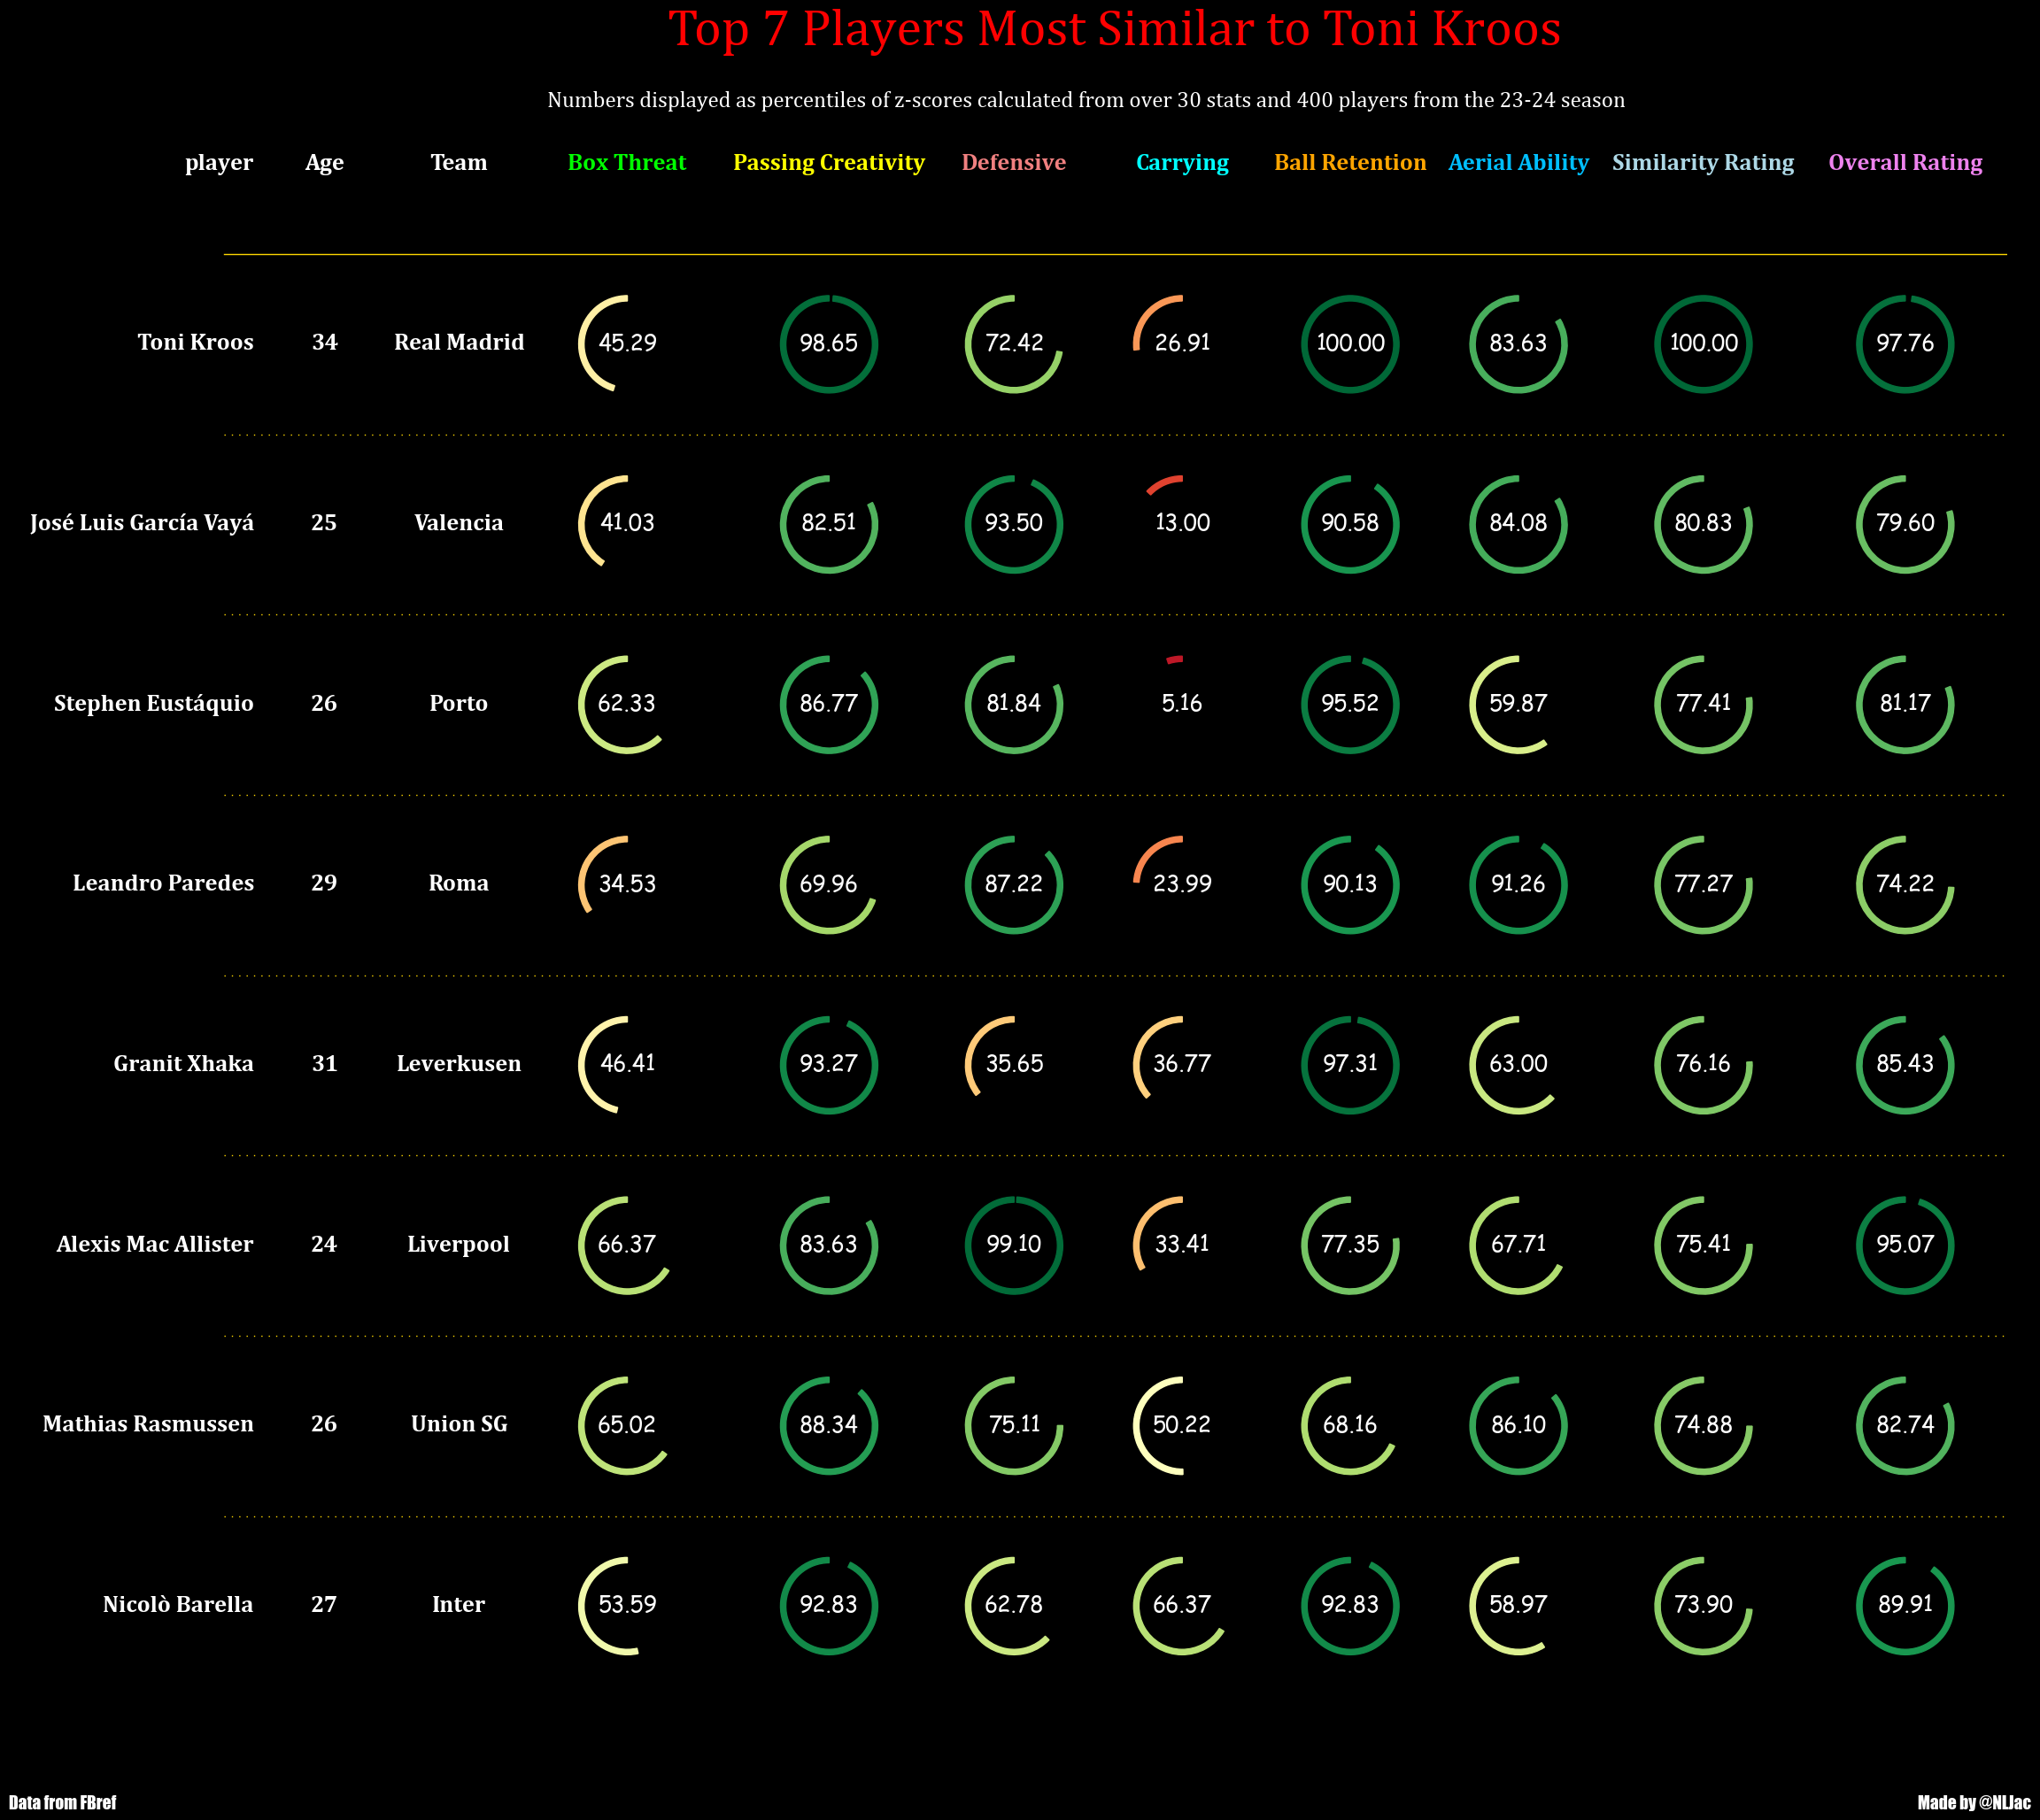

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean

# Assuming final_df is your DataFrame with the necessary columns
# Calculate percentiles for each player's stats
percentile_df = final_df.copy()
percentile_columns = [
    'Box_Threat_Z-Score', 
    'Passing_Creativity_Z-Score', 
    'Defensive_Z-Score', 
    'Carrying_Z-Score', 
    'Ball_Retention_Z-Score', 
    'Overall_Player_Rating',
    'Aerial_Ability_Z-Score'
]

for col in percentile_columns:
    percentile_df[col] = percentile_df[col].rank(pct=True) * 100

# Normalize the percentile columns for distance calculation
scaler = MinMaxScaler()
normalized_stats = scaler.fit_transform(percentile_df[percentile_columns])
normalized_df = pd.DataFrame(normalized_stats, columns=percentile_columns)

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 18, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Function to find similar players
def find_similar_players(player_name, top_n=7):
    if player_name not in percentile_df['player'].values:
        print(f"Player {player_name} not found in the dataset.")
        return
    
    player_index = percentile_df[percentile_df['player'] == player_name].index[0]
    player_vector = normalized_df.loc[player_index]
    
    distances = normalized_df.apply(lambda row: euclidean(player_vector, row), axis=1)
    percentile_df['distance'] = distances
    
    similar_players = percentile_df.sort_values(by='distance')[1:top_n+1]

    # Add the selected player to the top of the DataFrame
    selected_player = percentile_df[percentile_df['player'] == player_name]
    similar_players = pd.concat([selected_player, similar_players])

    # Convert distances to similarity scores
    max_distance = distances.max()
    similar_players['Similarity_Rating'] = 100 - (similar_players['distance'] / max_distance * 100)

    # Ensure the columns are ordered correctly and include 'player' for the index
    columns = [
        'player', 
        'age',
        'team',
        'Box_Threat_Z-Score', 
        'Passing_Creativity_Z-Score', 
        'Defensive_Z-Score', 
        'Carrying_Z-Score', 
        'Ball_Retention_Z-Score', 
        'Aerial_Ability_Z-Score',
        'Similarity_Rating',  # Add similarity rating column
        'Overall_Player_Rating',
    ]
    
    similar_players = similar_players[columns]
    similar_players.set_index('player', inplace=True)

    # Rename the columns to remove underscores and change 'main_pos' to 'Position' and 'age' to 'Age'
    similar_players.rename(columns={
        'Box_Threat_Z-Score': 'Box Threat',
        'Passing_Creativity_Z-Score': 'Passing Creativity',
        'Defensive_Z-Score': 'Defensive',
        'Carrying_Z-Score': 'Carrying',
        'Ball_Retention_Z-Score': 'Ball Retention',
        'Aerial_Ability_Z-Score': 'Aerial Ability',
        'Similarity_Rating': 'Similarity Rating',
        'Overall_Player_Rating': 'Overall Rating',
        'age': 'Age',
        'team': 'Team'
    }, inplace=True)

    # Ensure age column only shows the first 2 numerical values
    similar_players['Age'] = similar_players['Age'].astype(str).str[:2]

    # Define the colors for each column header
    column_colors = {
        "Box Threat": "lime",
        "Passing Creativity": "yellow",
        "Defensive": "lightcoral",
        "Carrying": "cyan",
        "Ball Retention": "orange",
        "Aerial Ability": "deepskyblue",
        "Similarity Rating": "lightblue",
        "Overall Rating": "violet"
    }

    # Update column definitions to include color mapping for the progress donuts
    col_defs = [
        ColumnDefinition(name="Box Threat", title="Box Threat", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Box Threat"]}, width=6),
        ColumnDefinition(name="Passing Creativity", title="Passing Creativity", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Passing Creativity"]}, width=6),
        ColumnDefinition(name="Defensive", title="Defensive", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Defensive"]}, width=5),
        ColumnDefinition(name="Carrying", title="Carrying", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Carrying"]}, width=5),
        ColumnDefinition(name="Ball Retention", title="Ball Retention", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Ball Retention"]}, width=5),
        ColumnDefinition(name="Aerial Ability", title="Aerial Ability", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Aerial Ability"]}, width=5),
        ColumnDefinition(name="Similarity Rating", title="Similarity Rating", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Similarity Rating"]}, width=6),
        ColumnDefinition(name="Overall Rating", title="Overall Rating", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Overall Rating"]}, width=6),
        ColumnDefinition(name="Age", title="Age", textprops={"ha": "center", "color": "white"}, width=4),
        ColumnDefinition(name="Team", title="Team", textprops={"ha": "center", "color": "white"}, width=4),
    ]

    # Create the plot
    fig, ax = plt.subplots(figsize=(26, 24))
    fig.patch.set_facecolor('black')  # Set figure background color to black
    ax.set_facecolor('black') 

    # Add title and subtitle to the plot
    plt.title(f"Top 7 Players Most Similar to {player_name}", color='Red', fontsize=42, fontname='Cambria', pad=20)
    plt.suptitle("Numbers displayed as percentiles of z-scores calculated from over 30 stats and 400 players from the 23-24 season", color='white', fontsize=18, fontname='Cambria', y=0.87)

    # Create and style the table using plottable
    table = Table(
        similar_players,  # Use the DataFrame with 'player' as the index
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        col_label_divider=True,
        ax=ax,
        textprops={"fontsize": 19, "color": "white", 'fontname': 'Cambria', 'fontweight': 'bold'},  # Set text color to white
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
        column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    )

    # Bold the index (player names) manually
    for label in ax.get_yaxis().get_ticklabels():
        label.set_fontweight('bold')

    # Add notes to the plot
    ax.text(
        -0.12,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Data from FBref",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    ax.text(
        0.95,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Made by @NLJac",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    # Show the plot
    plt.show()

# Example usage
player_name = "Toni Kroos"
find_similar_players(player_name)


In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean

# Assuming final_df is your DataFrame with the necessary columns
# Calculate percentiles for each player's stats
percentile_df = final_df.copy()
percentile_columns = [
    'Box_Threat_Z-Score', 
    'Passing_Creativity_Z-Score', 
    'Defensive_Z-Score', 
    'Carrying_Z-Score', 
    'Ball_Retention_Z-Score', 
    'Overall_Player_Rating',
    'Aerial_Ability_Z-Score'
]

for col in percentile_columns:
    percentile_df[col] = percentile_df[col].rank(pct=True) * 100

# Normalize the percentile columns for distance calculation
scaler = MinMaxScaler()
normalized_stats = scaler.fit_transform(percentile_df[percentile_columns])
normalized_df = pd.DataFrame(normalized_stats, columns=percentile_columns)

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 18, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Function to find similar players
def find_similar_players(player_name, top_n=7):
    if player_name not in percentile_df['player'].values:
        print(f"Player {player_name} not found in the dataset.")
        return
    
    player_index = percentile_df[percentile_df['player'] == player_name].index[0]
    player_vector = normalized_df.loc[player_index]
    
    distances = normalized_df.apply(lambda row: euclidean(player_vector, row), axis=1)
    percentile_df['distance'] = distances
    
    similar_players = percentile_df.sort_values(by='distance')[1:top_n+1]

    # Add the selected player to the top of the DataFrame
    selected_player = percentile_df[percentile_df['player'] == player_name]
    similar_players = pd.concat([selected_player, similar_players])

    # Convert distances to similarity scores
    max_distance = distances.max()
    similar_players['Similarity_Rating'] = 100 - (similar_players['distance'] / max_distance * 100)

    # Ensure the columns are ordered correctly and include 'player' for the index
    columns = [
        'player', 
        'age',
        'team',
        'Box_Threat_Z-Score', 
        'Passing_Creativity_Z-Score', 
        'Defensive_Z-Score', 
        'Carrying_Z-Score', 
        'Ball_Retention_Z-Score', 
        'Aerial_Ability_Z-Score',
        'Similarity_Rating',  # Add similarity rating column
        'Overall_Player_Rating',
    ]
    
    similar_players = similar_players[columns]
    similar_players.set_index('player', inplace=True)

    # Rename the columns to remove underscores and change 'main_pos' to 'Position' and 'age' to 'Age'
    similar_players.rename(columns={
        'Box_Threat_Z-Score': 'Box Threat',
        'Passing_Creativity_Z-Score': 'Passing Creativity',
        'Defensive_Z-Score': 'Defensive',
        'Carrying_Z-Score': 'Carrying',
        'Ball_Retention_Z-Score': 'Ball Retention',
        'Aerial_Ability_Z-Score': 'Aerial Ability',
        'Similarity_Rating': 'Similarity Rating',
        'Overall_Player_Rating': 'Overall Rating',
        'age': 'Age',
        'team': 'Team'
    }, inplace=True)

    # Ensure age column only shows the first 2 numerical values
    similar_players['Age'] = similar_players['Age'].astype(str).str[:2]

    # Define the colors for each column header
    column_colors = {
        "Box Threat": "lime",
        "Passing Creativity": "yellow",
        "Defensive": "lightcoral",
        "Carrying": "cyan",
        "Ball Retention": "orange",
        "Aerial Ability": "deepskyblue",
        "Similarity Rating": "lightblue",
        "Overall Rating": "violet"
    }

    # Update column definitions to include color mapping for the progress donuts
    col_defs = [
        ColumnDefinition(name="Box Threat", title="Box Threat", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Box Threat"]}, width=6),
        ColumnDefinition(name="Passing Creativity", title="Passing Creativity", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Passing Creativity"]}, width=6),
        ColumnDefinition(name="Defensive", title="Defensive", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Defensive"]}, width=5),
        ColumnDefinition(name="Carrying", title="Carrying", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Carrying"]}, width=5),
        ColumnDefinition(name="Ball Retention", title="Ball Retention", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Ball Retention"]}, width=5),
        ColumnDefinition(name="Aerial Ability", title="Aerial Ability", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Aerial Ability"]}, width=5),
        ColumnDefinition(name="Similarity Rating", title="Similarity Rating", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Similarity Rating"]}, width=6),
        ColumnDefinition(name="Overall Rating", title="Overall Rating", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Overall Rating"]}, width=6),
        ColumnDefinition(name="Age", title="Age", textprops={"ha": "center", "color": "white"}, width=4),
        ColumnDefinition(name="Team", title="Team", textprops={"ha": "center", "color": "white"}, width=4),
    ]

    # Create the plot
    fig, ax = plt.subplots(figsize=(26, 24))
    fig.patch.set_facecolor('black')  # Set figure background color to black
    ax.set_facecolor('black') 

    # Add title and subtitle to the plot
    plt.title(f"Top 7 Players Most Similar to {player_name}", color='Red', fontsize=42, fontname='Cambria')
    plt.suptitle("Numbers displayed as percentiles of z-scores calculated from over 30 stats and 400 players from the 23-24 season", color='white', fontsize=18, fontname='Cambria', y=0.87)

    # Create and style the table using plottable
    table = Table(
        similar_players,  # Use the DataFrame with 'player' as the index
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        col_label_divider=True,
        ax=ax,
        textprops={"fontsize": 19, "color": "white", 'fontname': 'Cambria', 'fontweight': 'bold'},  # Set text color to white
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
        column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    )

    # Bold the index (player names) manually
    for label in ax.get_yaxis().get_ticklabels():
        label.set_fontweight('bold')

    # Add notes to the plot
    ax.text(
        -0.12,  # X position (left edge)
        -0.02,  # Y position (below the plot)
        "Data from FBref",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    ax.text(
        0.95,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Made by @NLJac",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    return fig  # Return the figure instead of showing it

# Define the root directory for saving plots
root_dir = "C:\\Users\\jbuck\\Dropbox\\Soccer_Projects\\Player Scouting"

# Iterate through each player in the final_df
for player in final_df['player'].unique():
    league = final_df.loc[final_df['player'] == player, 'league'].values[0]
    team = final_df.loc[final_df['player'] == player, 'team'].values[0]

    # Define the directory path for the player
    player_dir = os.path.join(root_dir, league, team, player)

    # Create the directory if it doesn't exist
    os.makedirs(player_dir, exist_ok=True)

    # Find similar players and generate the plot
    fig = find_similar_players(player)

    # Save the plot to the player's directory
    fig.savefig(os.path.join(player_dir, f"Top 7 Most Similar Players to {player}.png"))

    # Print a message indicating the plot has been saved
    print(f"Saved plot for {player} in {player_dir}")


Saved plot for Declan Rice in C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Arsenal\Declan Rice
Saved plot for Jorginho in C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Arsenal\Jorginho
Saved plot for Kai Havertz in C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Arsenal\Kai Havertz
Saved plot for Martin Ødegaard in C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Arsenal\Martin Ødegaard
Saved plot for Thomas Partey in C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Arsenal\Thomas Partey
Saved plot for Boubacar Kamara in C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Aston Villa\Boubacar Kamara



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000022C3D064220> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022C3EB4A8E0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [35]:
final_df

,player,team,Box_Threat_Z-Score,Passing_Creativity_Z-Score,Defensive_Z-Score,Carrying_Z-Score,Ball_Retention_Z-Score,Aerial_Ability_Z-Score,Overall_Player_Rating,main_pos_x,age_x,league_x,main_pos_y,age_y,league_y
0,Declan Rice,Arsenal,57.231347,58.950389,75.530230,48.529595,61.057604,52.201617,68.128045,CM,24,ENG-Premier League,CM,24,ENG-Premier League
1,Jorginho,Arsenal,38.781152,62.624682,41.604380,39.412095,79.330882,50.747919,53.143301,CM,31,ENG-Premier League,CM,31,ENG-Premier League
2,Kai Havertz,Arsenal,83.488498,51.886525,47.124000,52.866811,69.127141,73.905949,67.077360,LM,24,ENG-Premier League,LM,24,ENG-Premier League
3,Martin Ødegaard,Arsenal,64.661209,91.488162,48.478781,57.924500,65.594379,35.583442,82.454585,RM,24,ENG-Premier League,RM,24,ENG-Premier League
4,Thomas Partey,Arsenal,41.560830,54.043315,40.011900,48.771434,54.814192,50.362172,46.894353,CM,30,ENG-Premier League,CM,30,ENG-Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Tomás Händel,Vitória,45.197005,49.769818,57.643010,49.608239,54.049023,63.628775,53.077574,CM,22,POR-League,CM,22,POR-League
442,Aleksandar Busnić,Vizela,40.171069,43.037727,41.739965,39.517381,42.102034,65.915154,36.730202,CM,25,POR-League,CM,25,POR-League
443,Diogo Nascimento,Vizela,44.563094,49.925359,48.260276,47.104434,44.706626,38.337871,44.598832,CM,20,POR-League,CM,20,POR-League
444,Pedro Ortiz,Vizela,38.153069,41.800433,45.637739,41.239639,37.306526,56.004638,35.432809,CM,22,POR-League,CM,22,POR-League


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut

# Assuming final_df is your DataFrame with the necessary columns
# Calculate percentiles for each player's stats
percentile_df = final_df.copy()
percentile_columns = [
    'Box_Threat_Z-Score', 
    'Passing_Creativity_Z-Score', 
    'Defensive_Z-Score', 
    'Carrying_Z-Score', 
    'Ball_Retention_Z-Score', 
    'Overall_Player_Rating',
    'Aerial_Ability_Z-Score'
]

for col in percentile_columns:
    percentile_df[col] = percentile_df[col].rank(pct=True) * 100

# Define the colors for each column header
column_colors = {
    "Similarity Score": "magenta",
    "Box_Threat_Z-Score": "lime",
    "Passing_Creativity_Z-Score": "yellow",
    "Defensive_Z-Score": "lightcoral",
    "Carrying_Z-Score": "cyan",
    "Ball_Retention_Z-Score": "orange",
    "Overall_Player_Rating": "violet",
    "Aerial_Ability_Z-Score": "deepskyblue"
}

# Path to save the images
base_path = "C:\\Users\\jbuck\\Dropbox\\Soccer_Projects\\Player Scouting"

# Function to get color based on value
def get_color(val):
    cmap = plt.get_cmap('RdYlGn')
    norm = Normalize(vmin=0, vmax=100)
    return cmap(norm(val))

# Custom function to format the displayed text
def formatted_progress_donut(ax, val, **kwargs):
    return progress_donut(ax, val, color=get_color(val), is_pct=False, textprops={'color': 'white', 'fontsize': 18, 'fontname': 'Comic Sans MS'}, formatter="{:.2f}".format(val))

# Update column definitions to include color mapping for the progress donuts
col_defs = [
    ColumnDefinition(name="Box Threat", title="Box Threat", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Box_Threat_Z-Score"]}, width=6),
    ColumnDefinition(name="Passing Creativity", title="Passing Creativity", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Passing_Creativity_Z-Score"]}, width=6),
    ColumnDefinition(name="Defensive", title="Defensive", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Defensive_Z-Score"]}, width=5),
    ColumnDefinition(name="Carrying", title="Carrying", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Carrying_Z-Score"]}, width=5),
    ColumnDefinition(name="Ball Retention", title="Ball Retention", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Ball_Retention_Z-Score"]}, width=5),
    ColumnDefinition(name="Aerial Ability", title="Aerial Ability", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Aerial_Ability_Z-Score"]}, width=5),
    ColumnDefinition(name="Overall Rating", title="Overall Rating", plot_fn=formatted_progress_donut, textprops={"ha": "center", "color": column_colors["Overall_Player_Rating"]}, width=6),
    ColumnDefinition(name="Age", title="Age", textprops={"ha": "center", "color": "white"}, width=3),
    ColumnDefinition(name="Position", title="Position", textprops={"ha": "center", "color": "white"}, width=3),
]

# Iterate through each team in the DataFrame
for team_name in final_df['team'].unique():
    # Filter the DataFrame for the specified team
    team_df = percentile_df[percentile_df['team'] == team_name].copy()

    # Sort the players by their overall rating
    team_df = team_df.sort_values(by='Overall_Player_Rating', ascending=False)

    # Select top players (you can change the number of players as needed)
    top_players = team_df.head(10)

    # Ensure the columns are ordered correctly and include 'player' for the index
    columns = [
        'player', 
        'age',
        'main_pos',
        'Box_Threat_Z-Score', 
        'Passing_Creativity_Z-Score', 
        'Defensive_Z-Score', 
        'Carrying_Z-Score', 
        'Ball_Retention_Z-Score', 
        'Aerial_Ability_Z-Score',
        'Overall_Player_Rating',
    ]

    top_players = top_players[columns]
    top_players.set_index('player', inplace=True)

    # Rename the columns to remove underscores and change 'main_pos' to 'Position' and 'age' to 'Age'
    top_players.rename(columns={
        'Box_Threat_Z-Score': 'Box Threat',
        'Passing_Creativity_Z-Score': 'Passing Creativity',
        'Defensive_Z-Score': 'Defensive',
        'Carrying_Z-Score': 'Carrying',
        'Ball_Retention_Z-Score': 'Ball Retention',
        'Aerial_Ability_Z-Score': 'Aerial Ability',
        'Overall_Player_Rating': 'Overall Rating',
        'age': 'Age',
        'main_pos': 'Position'
    }, inplace=True)

    # Create the plot
    fig, ax = plt.subplots(figsize=(26, 24))
    fig.patch.set_facecolor('black')  # Set figure background color to black
    ax.set_facecolor('black') 

    # Add title and subtitle to the plot
    plt.title(f"{team_name}'s Midfielder Ratings", color='Red', fontsize=42, fontname='Cambria', pad=20)
    plt.suptitle("Numbers displayed as percentiles of z-scores calculated from over 30 stats and 400 players", color='white', fontsize=16, fontname='Cambria', y=0.87)

    # Create and style the table using plottable
    table = Table(
        top_players,  # Use the DataFrame with 'player' as the index
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        col_label_divider=True,
        ax=ax,
        textprops={"fontsize": 19, "color": "white", 'fontname': 'Cambria', 'fontweight': 'bold'},  # Set text color to white
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)), "color": "gold"},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
        column_border_kw={"linewidth": 1, "linestyle": "-", "color": "gold"},
    )

    # Bold the index (player names) manually
    for label in ax.get_yaxis().get_ticklabels():
        label.set_fontweight('bold')

    # Add notes to the plot
    ax.text(
        -0.05,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Data from FBref",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    ax.text(
        0.95,  # X position (left edge)
        -0.055,  # Y position (below the plot)
        "Made by @NLJac",  # Text to display
        fontsize=14,  # Font size
        color='white',  # Text color
        fontname='Impact',  # Font name
        ha='left',  # Horizontal alignment
        va='top',  # Vertical alignment
        transform=ax.transAxes  # Transform coordinates to axes space
    )

    # Get the league name for the team
    league_name = team_df['league'].iloc[0]

    # Create the directory path for the league and team
    league_path = os.path.join(base_path, league_name)
    team_path = os.path.join(league_path, team_name)

    # Create directories if they do not exist
    os.makedirs(team_path, exist_ok=True)

    # Save the plot
    save_path = os.path.join(team_path, "Midfielder Trait Tables.png")
    plt.savefig(save_path, bbox_inches='tight', facecolor='black')

    # Print a statement indicating the file has been saved
    print(f"Saved: {save_path}")

    # Close the plot to free up memory
    plt.close(fig)


Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Arsenal\Midfielder Trait Tables.png
Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Aston Villa\Midfielder Trait Tables.png
Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Brentford\Midfielder Trait Tables.png
Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Brighton\Midfielder Trait Tables.png
Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Burnley\Midfielder Trait Tables.png
Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Crystal Palace\Midfielder Trait Tables.png
Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Everton\Midfielder Trait Tables.png
Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Player Scouting\ENG-Premier League\Liverpool\Midfielder Trait Tables.png
Saved: C:\Users\jbuck\Dropbox\Soccer_Projects\Pl

Summary Statistics:
       Box_Threat_Z-Score  Passing_Creativity_Z-Score  Defensive_Z-Score  \
count          446.000000                  446.000000         446.000000   
mean            50.000000                   50.000000          50.000000   
std             10.000000                   10.000000          10.000000   
min             36.027124                   35.047669          33.848785   
25%             41.742885                   42.165837          42.085147   
50%             49.021106                   49.302477          49.701757   
75%             55.491802                   55.771004          56.545956   
max             87.317185                   85.750312          84.991185   

       Carrying_Z-Score  Ball_Retention_Z-Score  Aerial_Ability_Z-Score  \
count        446.000000              446.000000              446.000000   
mean          50.000000               50.000000               50.000000   
std           10.000000               10.000000               10.00000

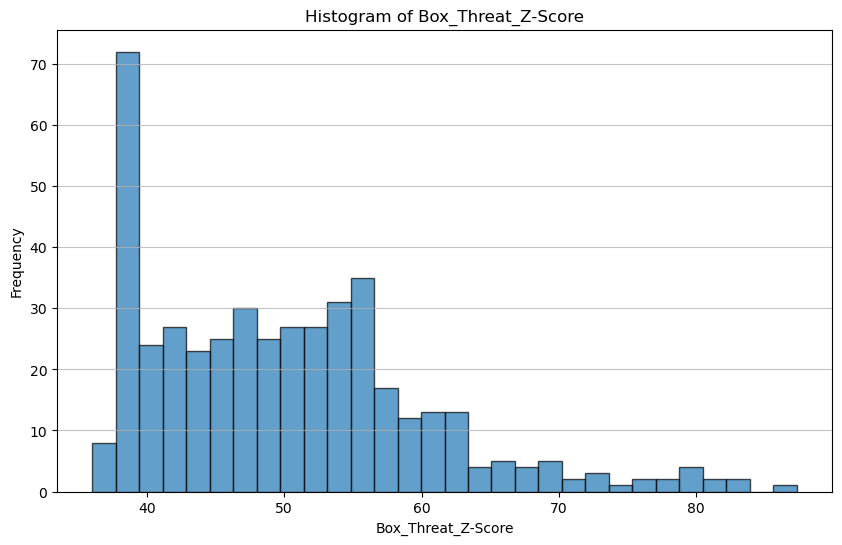

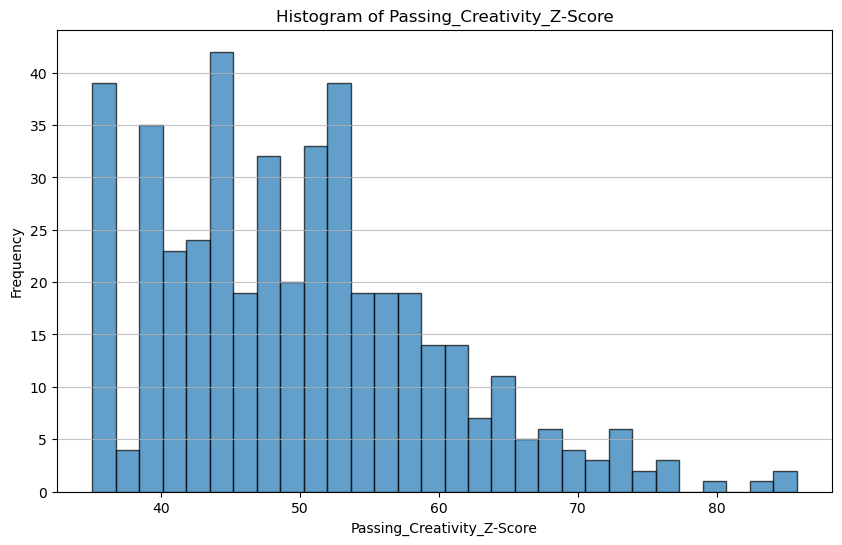

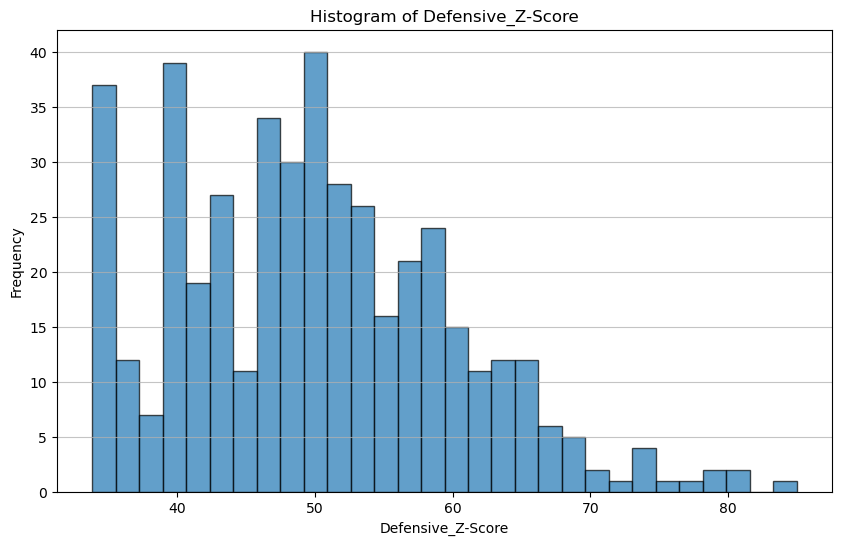

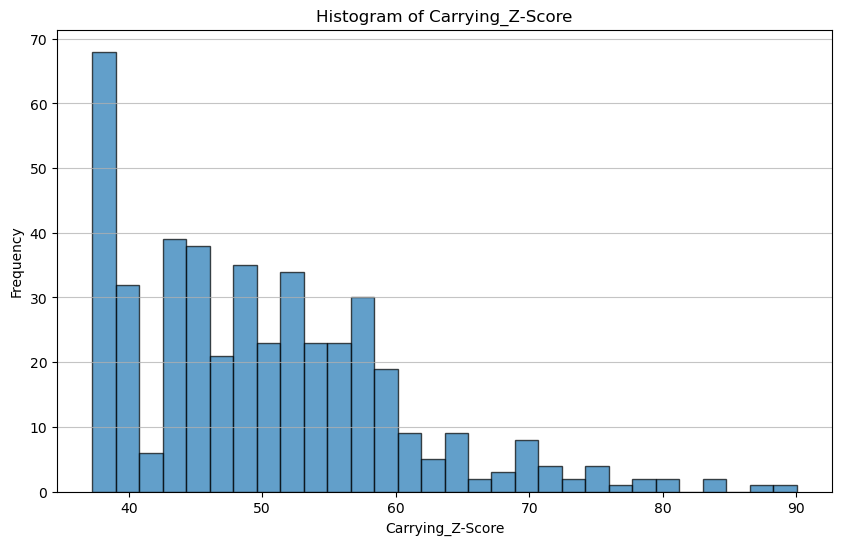

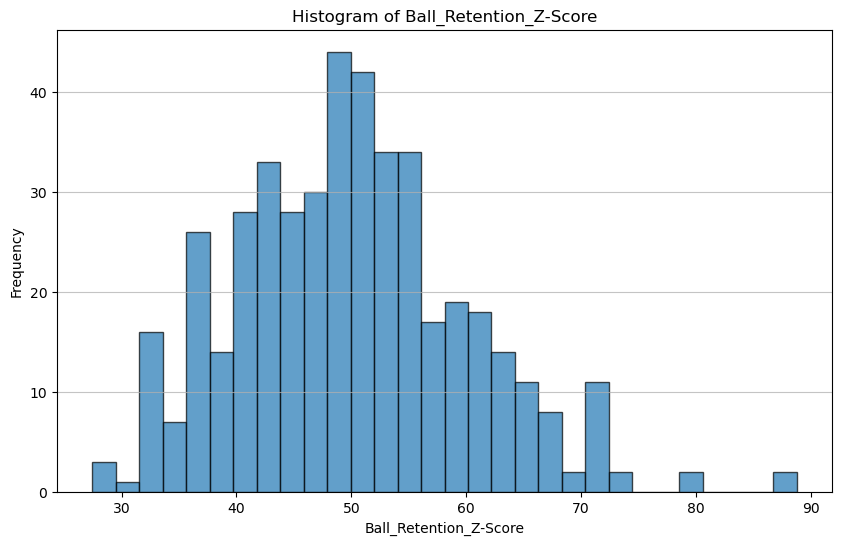

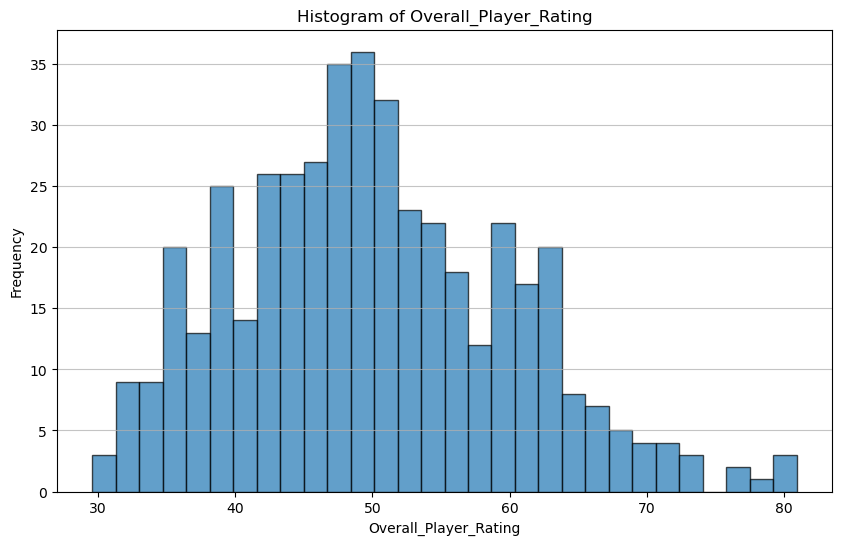

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate summary statistics
summary_stats = final_df.describe()

# Display the summary statistics
print("Summary Statistics:")
print(summary_stats)

# List of columns to plot histograms for
columns_to_plot = ['Box_Threat_Z-Score', 'Passing_Creativity_Z-Score', 'Defensive_Z-Score', 'Carrying_Z-Score', 'Ball_Retention_Z-Score', 'Overall_Player_Rating']

# Plot histograms
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.hist(final_df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [7]:
# Assuming zscore_df is already defined and contains the necessary columns

# Combine z-scores into different categories
zscore_df.loc[:, 'Box_Threat_Z-Score'] = zscore_df[['Shots (per 90) Z-Score', 'xG (per 90) Z-Score', 'Standard Goals Z-Score', 'Touches (per 90) Z-Score', 'Expected Goals - xG Z-Score']].mean(axis=1)

zscore_df.loc[:, 'Passing_Creativity_Z-Score'] = zscore_df[['SCA (per 90) Z-Score', 'Progressive Passes per Total Passes Z-Score', 'xA (per 90) Z-Score', 'Progressive Passes Z-Score', 'Key Passes Z-Score']].mean(axis=1)

zscore_df.loc[:, 'Defensive_Z-Score'] = zscore_df[['Tackles Per 100 Touches Allowed Z-Score', 'Blocks Per 100 Touches Allowed Z-Score', 'Challenge Tackles Per 100 Touches Allowed Z-Score', 'Tackles Won Per 100 Team Touches Allowed', 'Challenges Won Pct Z-Score']].mean(axis=1)

zscore_df.loc[:, 'Carrying_Z-Score'] = zscore_df[['Carries in 1/3 Z-Score', 'Carries CPA Z-Score', 'Take-Ons Tackled % Z-Score', 'Carries Z-Score', 'Progressive Carries Z-Score', 'Take-Ons Attempted Z-Score', 'Progressive Carries per Carry Z-Score', 'Progressive Distance per Carry Z-Score']].mean(axis=1)

zscore_df.loc[:, 'Ball_Retention_Z-Score'] = zscore_df[['Total Pass Completion % Z-Score', 'Short and Med Passes Per Long Pass Z-Score', 'Carries Mis and Dis Z-Score', 'Total Passes Completed % Z-Score', 'Carries Per Dis or Mis Z-Score']].mean(axis=1)

# Select columns to display in the final DataFrame
final_columns = [
    'player', 'team', 'Box_Threat_Z-Score', 'Passing_Creativity_Z-Score', 'Defensive_Z-Score', 'Carrying_Z-Score', 'Ball_Retention_Z-Score'
]

# Create the final DataFrame
final_df = zscore_df[final_columns]

# Display the final DataFrame
final_df


,player,team,Box_Threat_Z-Score,Passing_Creativity_Z-Score,Defensive_Z-Score,Carrying_Z-Score,Ball_Retention_Z-Score
0,Declan Rice,Arsenal,56.825727,57.015458,68.216991,51.670206,56.694395
3,Jorginho,Arsenal,41.407253,60.780842,43.733368,50.348092,61.243882
4,Kai Havertz,Arsenal,76.593099,53.209512,47.182210,49.204056,69.988458
5,Martin Ødegaard,Arsenal,64.543042,81.319527,48.564671,56.541305,55.352715
7,Thomas Partey,Arsenal,43.045878,53.064868,41.512753,51.054228,57.510239
...,...,...,...,...,...,...,...
823,Tomás Händel,Vitória,46.445691,50.041934,58.078110,47.784674,50.919076
825,Aleksandar Busnić,Vizela,41.685154,44.139586,43.838935,42.383599,47.211610
827,Diogo Nascimento,Vizela,44.069226,50.206910,47.209566,47.326252,55.081140
829,Pedro Ortiz,Vizela,40.411242,41.983481,46.966971,43.297285,52.154268


In [16]:
# Sort the DataFrame by Overall_Player_Rating in descending order and select the top 30 players
top_30_players = final_df.sort_values(by='Overall_Player_Rating', ascending=False).head(30)

# Display the top 30 players
top_30_players

,player,team,Box_Threat_Z-Score,Passing_Creativity_Z-Score,Defensive_Z-Score,Carrying_Z-Score,Ball_Retention_Z-Score,Overall_Player_Rating
702,Ismael Saibari,PSV Eindhoven,360.576770,330.269890,112.668444,276.986272,262.494051,268.599086
5,Martin Ødegaard,Arsenal,315.836216,411.680106,130.740139,228.578457,243.921411,266.151266
346,Cameron Puertas,Union SG,288.978218,354.779171,224.602628,279.503833,121.463699,253.865510
73,Bernardo Silva,Manchester City,261.961750,280.783883,204.755564,261.123608,249.741712,251.673304
76,Kevin De Bruyne,Manchester City,373.396393,431.650374,39.287956,282.913261,108.922632,247.234123
80,Bruno Guimarães,Newcastle Utd,250.308584,311.792427,282.297345,192.793954,198.120335,247.062529
403,Hakan Çalhanoğlu,Inter,307.838455,258.812994,264.475538,167.901612,219.760969,243.757914
484,Kevin Stöger,Bochum,283.927656,427.501092,193.742764,220.084356,76.033801,240.257934
0,Declan Rice,Arsenal,239.258783,256.623276,285.842177,174.965512,242.813540,239.900657
59,Alexis Mac Allister,Liverpool,214.849191,286.529783,317.753841,122.191584,220.747559,232.414392


In [9]:
import pandas as pd

# Calculate summary statistics for z-scores
summary_stats = zscore_df[zscore_columns].describe()

# Display summary statistics
print(summary_stats)


       SCA (per 90) Z-Score  Touches (per 90) Z-Score  Shots (per 90) Z-Score  \
count            446.000000                446.000000              446.000000   
mean              50.000000                 50.000000               50.000000   
std               10.011230                 10.011230               10.011230   
min               30.886993                 36.326070               32.021658   
25%               42.969736                 43.036116               42.772185   
50%               48.206873                 47.701476               48.896989   
75%               56.035732                 54.261299               54.879843   
max               98.011524                 91.226859               83.197767   

       xG (per 90) Z-Score  xA (per 90) Z-Score  Standard Goals Z-Score  \
count           446.000000           446.000000              446.000000   
mean             50.000000            50.000000               50.000000   
std              10.011230            10.0112

In [8]:
for column in CM_team_stats_df.columns:
    print(column)

league
season
team
player
nation
pos
age
born
90s
Standard_Gls
Standard_Sh
Standard_SoT
Standard_SoT%
Standard_Sh/90
Standard_SoT/90
Standard_G/Sh
Standard_G/SoT
Standard_Dist
Standard_FK
Standard_PK
Standard_PKatt
Expected_xG
Expected_npxG
Expected_npxG/Sh
Expected_G-xG
Expected_np:G-xG
League
league.1
season.1
nation.1
pos.1
age.1
born.1
90s.1
SCA_SCA
SCA_SCA90
SCA Types_PassLive
SCA Types_PassDead
SCA Types_TO
SCA Types_Sh
SCA Types_Fld
SCA Types_Def
GCA_GCA
GCA_GCA90
GCA Types_PassLive
GCA Types_PassDead
GCA Types_TO
GCA Types_Sh
GCA Types_Fld
GCA Types_Def
League.1
league.2
season.2
nation.2
pos.2
age.2
born.2
90s.2
Tackles_Tkl
Tackles_TklW
Tackles_Def 3rd
Tackles_Mid 3rd
Tackles_Att 3rd
Challenges_Tkl
Challenges_Att
Challenges_Tkl%
Challenges_Lost
Blocks_Blocks
Blocks_Sh
Blocks_Pass
Int
Tkl+Int
Clr
Err
League.2
league.3
season.3
nation.3
pos.3
age.3
born.3
90s.3
Performance_CrdY
Performance_CrdR
Performance_2CrdY
Performance_Fls
Performance_Fld
Performance_Off
Performance_Crs
Per